In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default


In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('Data').sheet1

In [ ]:
data = worksheet.get_all_values()
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})
dataset1.head()

,Input,Output
0,1.0,11.0
1,2.0,69.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
X = dataset1[['Input']].values
y = dataset1[['Output']].values
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [12.],
       [14.],
       [15.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)


In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:

ai_brain = Sequential([
    Dense(6,activation = 'relu'),
    Dense(6,activation = 'relu'),
    Dense(1)
])

In [ ]:

ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')


In [ ]:
ai_brain.fit(X_train1,y_train,epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 7321.2393
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 7319.6831
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 7318.5566
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 7317.6094
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 7316.7832
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 7316.0552
Epoch 7/2000
1/1 [==============================] - 0s 12ms/step - loss: 7315.3740
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 7314.7334
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 7314.1182
Epoch 10/2000
1/1 [==============================] - 0s 12ms/step - loss: 7313.5273
Epoch 11/2000
1/1 [==============================] - 0s 12ms/step - loss: 7312.9854
Epoch 12/2000
1/1 [==============================] - 0s 14ms/step - loss: 7312.4561
Epoch

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

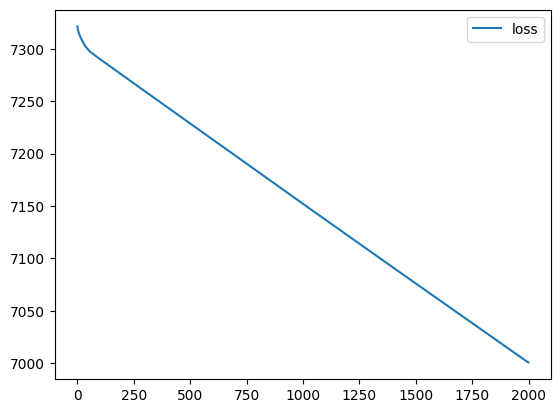

In [ ]:

loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 154ms/step - loss: 5442.0562


5442.05615234375

In [ ]:

X_n1 = [[30]]

In [ ]:

X_n1_1 = Scaler.transform(X_n1)

In [ ]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 87ms/step


array([[1.9106839]], dtype=float32)